<a href="https://colab.research.google.com/github/LEFT-BEE/KMU-Algorithm/blob/master/Latent_Factor_Model_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Latent Factir Model Practice

## 데이터 전처리

In [3]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
#판다스를 이용하여 파일 불러오기
!ls "/content/gdrive/MyDrive/국민대/데이터과학"

train = pd.read_csv("/content/gdrive/MyDrive/국민대/데이터과학/ml-100k/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/MyDrive/국민대/데이터과학/ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

'logistic regression.ipynb'   Softmax_Regression_Pratice.ipynb
 ml-100k		      Untitled0.ipynb
 ml-25m


In [5]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

## 모델구현 및 학습

$H(i,x) = p_i \cdot p_j + bias_{user} +  bias_{item} + mean$

$cost(P,Q) = \sum_{(i,j) \in R}(r_{xi} - H(i,x))^2 + \lambda 1\sum P^2 + \lambda 2\sum Q^2 +\lambda 3\sum bias_{item}^2 + \lambda 4\sum bias_{user}^2$


In [28]:
#하이퍼 파라미터 
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True) 
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item() #레이팅의 평균

In [29]:
#하이퍼파라미터
Epoch = 1000
LR = 0.1
optimizer = torch.optim.Adam([P,Q ,bias_item, bias_user] , lr = LR)
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001

In [30]:
X = []
Y = [] 
Y_test = []
optimizer = torch.optim.Adam([P,Q ,bias_item, bias_user] , lr = LR)

for epoch in range(Epoch):
  hypothesis = torch.sum(P[items] * Q[users], dim= 1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) +lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():  
    X.append(epoch)
    Y.append(cost)

    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))
 

epoch: 0, cost: 13.020241
epoch: 100, cost: 0.606150
epoch: 200, cost: 0.579136
epoch: 300, cost: 0.574743
epoch: 400, cost: 0.573548
epoch: 500, cost: 0.573148
epoch: 600, cost: 0.572909
epoch: 700, cost: 0.572701
epoch: 800, cost: 0.572534
epoch: 900, cost: 0.572407


In [31]:
print(cost_test)

tensor(0.8686)


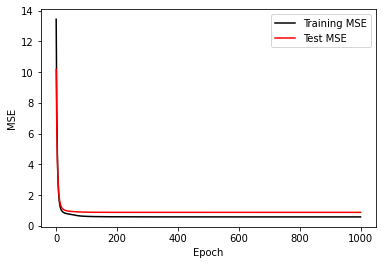

In [ ]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y,c="black" , label = "Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

## 파라미터조정 

In [122]:
import math

In [144]:
#하이퍼 파라미터 
rank = 50
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True) 
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item() #레이팅의 평균

In [145]:
#하이퍼파라미터
Epoch = 2000
LR = 0.99
optimizer = torch.optim.Adam([P,Q ,bias_item, bias_user] , lr = LR)
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 =  0.0001

In [146]:
X = []
Y = [] 
Y_test = []

for epoch in range(1, Epoch):
  optimizer = torch.optim.Adam([P,Q ,bias_item, bias_user] , lr = LR)
  hypothesis = torch.sum((P[items]) * Q[users], dim= 1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) +lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



  with torch.no_grad():  
    X.append(epoch)
    Y.append(cost)

    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))
  if epoch%30 ==0:
    LR = (1+ math.cos((epoch*math.pi) / Epoch)) * 0.5 * LR



epoch: 100, cost: 582.330444
epoch: 200, cost: 401.435791
epoch: 300, cost: 206.264053
epoch: 400, cost: 89.245140
epoch: 500, cost: 6.462314
epoch: 600, cost: 1.693665
epoch: 700, cost: 0.399998
epoch: 800, cost: 0.331174
epoch: 900, cost: 0.319914
epoch: 1000, cost: 0.317011
epoch: 1100, cost: 0.316616
epoch: 1200, cost: 0.316598
epoch: 1300, cost: 0.316598
epoch: 1400, cost: 0.316598
epoch: 1500, cost: 0.316598
epoch: 1600, cost: 0.316598
epoch: 1700, cost: 0.316598
epoch: 1800, cost: 0.316598
epoch: 1900, cost: 0.316598


In [147]:
cost_test

tensor(0.8858)

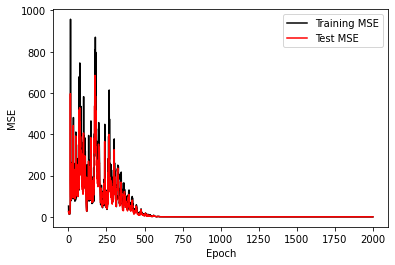

In [148]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y,c="black" , label = "Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()